# Project 4: "WeRateDoge" Data Wrngling

## Followed Data Wrangling Steps
1. ### Gather Data
2. ### Assess
3. ### Clean
4. ### Visualize The Relations

## 1. Gather Twitter Data Information:
In this step the gathered data will be:
1. Retrieve the information from the given `twitter-archive-enhanced.csv` file
2. Gather the information of tweets in `twitter-archive-enhanced.csv` file using Twitter API
3. Download the related tweets gathered images information file `image-predictions.tsv`

#### Import needed libraries

In [1]:
# Import generally needed libraries across the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Retrieve the information from the given `twitter-archive-enhanced.csv` file

In [2]:
# Load Tweets info to download them from Twitter
archive_df = pd.read_csv('./twitter-archive-enhanced.csv', encoding='utf-8')
tweet_ids = archive_df.tweet_id.values
print(len(tweet_ids))
archive_df.head(3)

2356


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2. Gather the information of tweets in `twitter-archive-enhanced.csv` file using Twitter API
**This code is copied from Udacity project itself**

In [2]:
# Gathering Twitter dataset
# Import needed libraries to download Twitter dataset
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# This code is provided from Udacity itself

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [67]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)    

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [3]:
# Preview downloaded twitter information
tweets_json_df = pd.read_json ('tweet_json.txt', lines = True)
tweets_json_df.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35098,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7396,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30384,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5509,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22842,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3637,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### 3. Download the related tweets gathered images information file image-predictions.tsv

In [4]:
# Download the related tweets images' predictions
import requests

image_predictions_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(image_predictions_url)
with open('image-predictions.tsv', 'wb') as image_file:
    image_file.write(response.content)

In [5]:
# Load dogs images predictions
image_df = pd.read_csv('./image-predictions.tsv', sep = '\t')
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## 2. Assess Datasets

The following points quality and tidiness issues were detected after previewing the datasets using programmatic previews and manuall preview on EXCEL


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
archive_df['tweet_id'].nunique()

2356

The information showed that this table contains:
2356 different tweets
1. Very limited rows contains values in  `in_reply_to_status_id` and in `in_reply_to_user_id`. Therefore, keeping these columns will not help in any future analysis
2. `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns helps us in defining retweet rows that shall be deleted, as we need only the original tweets. All of these columns shall be deleted after removing the retweets
3. Change tweet_id from int64 to object
4. Change timestamp type from object to datetime
5. `in_reply_to_status_id` and `in_reply_to_user_id` contains non null values in 3.3% of the entire dataset, therefore keepiong them will not help in any future analysis

In [8]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
610,797236660651966464,NaN,NaN,2016-11-12 00:36:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pancake. She loves Batman and winks li...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797236660...,12,10,Pancake,None,None,None,None
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,None,None,None,None
1136,728387165835677696,NaN,NaN,2016-05-06 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Enchilada (yes, that's her real name)....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728387165...,12,10,Enchilada,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None


6. The dataframe description and sample, and after previewing the dataframe using Excel, it looks that `rating_denominator` and `rating_numerator` have wrong values
7. Additionally `rating_denominator` and `rating_numerator` have wrong datatypes as thier values might floats not only integers
<br>
<br>
**Tidiness**
1. The four dogs stages `doggo`, `floofer`, `pupper` and `puppo` shall be combined into one `stage` column and drop all these columns

In [10]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
Toby           7
an             7
Bailey         7
Jack           6
Koda           6
Leo            6
Milo           6
Stanley        6
Scout          6
Jax            6
Bella          6
Oscar          6
Dave           6
Rusty          6
Sunny          5
            ... 
Zara           1
Dido           1
Harry          1
Brady          1
Hermione       1
Mingus         1
Walker         1
Lupe           1
Maude          1
Jett           1
Snoopy         1
Chaz           1
Timofy         1
Stephanus      1
by             1
Cedrick        1
Pepper         1
Snoop          1
Bodie          1
Apollo         1
Katie          1
Jareld         1
Tonks          1
Blakely        1
Creg           1
Chloe          1
Emmie          1
Mutt          

8. This showed that the names that starts with lowercase are stopwords not the correct names

In [11]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_df['tweet_id'].nunique()

2075

In [13]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
1204,741743634094141440,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador_retriever,0.786089,True,flat-coated_retriever,0.048652,True,Chesapeake_Bay_retriever,0.034693,True
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West_Highland_white_terrier,0.035667,True
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True


In [14]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


`image_df` information describe, and sample showed the following problems:
9. Incorrect datatype for the `tweet_id`, shall be object not int64
10. lower and uppercase breeds for all `p1`, `p2` and `p3` shall be all converted to lowercase

In [15]:
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [16]:
tweets_json_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2331.000000,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2197.0,2197.0,2.600000e+01,2.600000e+01,2331.000000
mean,NaN,NaN,7330.359073,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2599.212355
std,NaN,NaN,11385.174852,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4396.707554
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1272.500000,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,527.500000
50%,NaN,NaN,3183.000000,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1213.000000
75%,NaN,NaN,8960.500000,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3012.500000
max,NaN,NaN,150961.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,74621.000000


In [17]:
tweets_json_df.sample(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1944,NaN,NaN,2015-12-06 01:48:12,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673317979384254464, 'id_str'...",824,False,Take a moment and appreciate how these two dog...,NaN,...,NaN,NaN,NaN,NaN,230,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
731,NaN,NaN,2016-09-23 01:04:56,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Hurley. He's the curly one...,NaN,...,NaN,NaN,NaN,NaN,17860,False,{'created_at': 'Wed Dec 23 00:45:35 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
253,NaN,NaN,2017-03-15 20:48:07,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 842115183262736384, 'id_str'...",13524,False,This is Bentley. It's his first time going to ...,NaN,...,NaN,NaN,NaN,NaN,2887,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


`tweets_json_df` information describe, and sample showed the following problems:
11. Lots of unneeded columns in our data analysis, we will need to keep only `id`, `retweet_count` and `favorite_count` columns
12. Inocrrect data type for the `id` column, shall be changed to object

**Tidiness**
2. Traversing all the tables showed that all of them contian information about the same tweets and can be combined all in one table contains the related information about all of them

### Summary of noticed Issues
#### Quality
Content Issues: Completeness, Validity, Accuracy, Consistency
<br>
**`archive_df` Table**
1. Remove retweets rows and keep original tweets only
2. Drop `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns as they contian only None for the original tweets
3. Change `tweet_id` from int64 to object
4. Change `timestamp` type from object to datetime
5. Remove  `in_reply_to_status_id` and `in_reply_to_user_id` columns as they present only non null values in 3.3% of the entire dataset and will not help in any future analysis
6. Correct the wrong values in `rating_denominator` and `rating_numerator` columns
7. Change the datatypes for `rating_denominator` and `rating_numerator` to floats. As the correct ratings contain float values
8. Replace the lowercase names with "UNKNOWN" as they are for stopwords not the correct names

**`image_df` Table** 
9. Change `tweet_id` from int64 to object
10. Correct the names capitalization in `p1`, `p2` and `p3` by converting them all to lowercase

**`tweets_json_df` Table**
11. Remove extra columns by keeping only `id`, `retweet_count` and `favorite_count` 
12. Rename the `id` column to `tweet_id` to be consistent with the other tables `tweet_id` column
13. Change `tweet_id` from int64 to object

#### Tidiness
Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table.

1. Join the three tables using the unique column value `tweet_id`
2. Melt the four dogs stages `doggo`, `floofer`, `pupper` and `puppo` columns into `stage` column and drop the four columns from `archive_df` table
3. Add `rating` column resulted from dividing the correct `rating_numerator` on the correct `rating_denominator`, and remove these two columns 


* Changing Tweet_id in the three tables will be done after merging the three tables to reduce redunduncy

## 3. Clean

**0. Make Copies of all tables before cleaning**

In [18]:
archive_df_copy = archive_df.copy()
image_df_copy = image_df.copy()
tweets_json_df_copy = tweets_json_df.copy()

### Quality Issues:
#### **`archive_df`**  Table

#### 1.  Remove retweets rows and keep original tweets only

In [19]:
# CODE: Keep only the rows that contains None values in retweeted_status_id
archive_df_copy = archive_df_copy[pd.isnull(archive_df_copy['retweeted_status_id'])].reset_index()
# TEST: Check if the resulted dataframe does not contain any retweets, by checking its count (only counts the not None values)
archive_df_copy['retweeted_status_id'].count()

0

In [20]:
# The preformed step above will add index column, therefore we will need to delete it here
archive_df_copy.drop(['index'], axis=1, inplace=True)
#TEST
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 2. Drop `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns as they contian only None for the original tweets

In [21]:
# CODE: Drop the mentioned columns
archive_df_copy.drop(['retweeted_status_id'], axis=1, inplace=True)
archive_df_copy.drop(['retweeted_status_user_id'], axis=1, inplace=True)
archive_df_copy.drop(['retweeted_status_timestamp'], axis=1, inplace=True)
# TEST: Check the resulted dataframe
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


#### 3. Change the `tweet_id` type from int64 to object
Will be done after merging the tables

#### 4. Change the `timestamp` timestamp type to object

In [22]:
# CODE: Change timestamp to datetime type
archive_df_copy['timestamp'] = pd.to_datetime(archive_df_copy['timestamp'])
# TEST: Check the resulted dataframe
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 238.0+ KB


#### 5. Remove  `in_reply_to_status_id` and `in_reply_to_user_id` columns as they present only non null values in 3.3% of the entire dataset

In [23]:
# CODE: Drop the mentioned columns
archive_df_copy.drop(['in_reply_to_status_id'], axis=1, inplace=True)
archive_df_copy.drop(['in_reply_to_user_id'], axis=1, inplace=True)
# TEST: Check the resulted dataframe
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 204.0+ KB


#### 6. Correct the wrong values in `rating_denominator` and `rating_numerator` columns

In [24]:
# CODE: Extract the correct rating_denominator and rating_numerator from the tweet text
archive_df_copy[['rating_numerator', 'rating_denominator']] = archive_df_copy['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
#TEST: check the resulted intermediate results then add them to the dataframe and recheck the results
archive_df_copy.info()
archive_df_copy.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null object
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 204.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 7. Change the datatypes for `rating_denominator` and `rating_numerator` to floats. As the correct ratings contain float values

In [25]:
# CODE: Change the datatypes for `rating_denominator` and `rating_numerator` to floats
archive_df_copy['rating_denominator'] = archive_df_copy['rating_denominator'].astype(float)
archive_df_copy['rating_numerator'] = archive_df_copy['rating_numerator'].astype(float)

# TEST: Check the resulted dataframe
archive_df_copy.info()
archive_df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 204.0+ KB


,tweet_id,rating_numerator,rating_denominator
count,2.175000e+03,2175.000000,2175.000000
mean,7.371205e+17,13.177140,10.492874
std,6.748668e+16,47.705088,7.019084
min,6.660209e+17,0.000000,0.000000
25%,6.768432e+17,10.000000,10.000000
50%,7.098528e+17,11.000000,10.000000
75%,7.894226e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [26]:
#TEST:# Check if rating_denominator does not contian zeros
#widen the column space to see the entire text value
pd.options.display.max_colwidth = 150
archive_df_copy[archive_df_copy['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
263,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0.0,None,None,None,None,None


The `text` value showed that it is not a rating but an adivce to a friend about writing a rating, therefore it shall be omitted from the dataset

In [27]:
#CODE:
archive_df_copy = archive_df_copy.drop(archive_df_copy.index[263]).reset_index()
#TEST: the row text value with the same index
archive_df_copy['text'][263]

"We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL"

#### 8. Replace the lowercase names with "UNKNOWN" as they are for stopwords not the correct names

In [28]:
# CODE: Get the names that have lowercase names to delete their related rows
print("Preview the names that are extracted incorrectly for the dogs:")
print(archive_df_copy[archive_df_copy['name'].str.islower()]['name'].unique())
print("The total number of thte rows that contian incorrect names is: ", str(len(archive_df_copy[archive_df_copy['name'].str.islower()])))
# Replace the incorrect names with " "UNKNOWN""
archive_df_copy.loc[archive_df_copy['name'].str.islower(), 'name'] = "UNKNOWN"
# TEST: Check the resulted dataframe
print(archive_df_copy['name'].value_counts())

Preview the names that are extracted incorrectly for the dogs:
['such' 'a' 'quite' 'not' 'one' 'incredibly' 'very' 'my' 'his' 'an'
 'actually' 'just' 'getting' 'mad' 'this' 'unacceptable' 'all' 'old'
 'infuriating' 'the' 'by' 'officially' 'life' 'light' 'space']
The total number of thte rows that contian incorrect names is:  104
None         679
UNKNOWN      104
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Oscar          6
Stanley        6
Bailey         6
Jax            6
Bella          6
Koda           6
Bo             6
Dave           5
Scout          5
Milo           5
Chester        5
Leo            5
Bentley        5
Rusty          5
Buddy          5
Louis          5
Gary           4
            ... 
Dug            1
Fynn           1
Halo           1
Chelsea        1
Mutt           1
Levi           1
Bert           1
Chloe          1
Cannon

#### `image_df` Table

#### 9. Change `tweet_id` from int64 to object
Will be done after merging the tables

#### 10. Correct the names capitalization in `p1`, `p2` and `p3` by converting them all to lowercase

In [29]:
# CODE: Change tweet_id type to object
image_df_copy['p1'] = image_df_copy['p1'].str.lower()
image_df_copy['p2'] = image_df_copy['p2'].str.lower()
image_df_copy['p3'] = image_df_copy['p3'].str.lower()
# TEST: Check the changes on a sample of the dataframe
image_df_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1290,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg,1,golden_retriever,0.714409,True,afghan_hound,0.066163,True,chow,0.028413,True
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,norwich_terrier,0.419838,True,cairn,0.351876,True,norfolk_terrier,0.051094,True
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,greater_swiss_mountain_dog,0.519428,True,boxer,0.121500,True,staffordshire_bullterrier,0.114498,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,labrador_retriever,0.068718,True,kuvasz,0.030387,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,pembroke,0.371361,True,chow,0.249394,True,pomeranian,0.241878,True
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,border_collie,0.059437,True,groenendael,0.026720,True
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,labrador_retriever,0.030986,True
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True


#### **`tweets_json_df` Table**

####  11. Remove extra columns by keeping only `id`, `retweet_count` and `favorite_count` 

In [30]:
# CODE: Keep 'id', 'retweet_count', 'favorite_count' columns from tweets_json_df_copy
tweets_json_df_copy = tweets_json_df_copy[['id', 'retweet_count', 'favorite_count']]
# TEST: check the resulted dataframe info
tweets_json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### 12. Rename the `id` column to `tweet_id` to be consistent with the other tables `tweet_id` column

In [31]:
# CODE: Change the column id to tweet_id for consistency
tweets_json_df_copy = tweets_json_df_copy.rename(columns={'id': 'tweet_id'})
# TEST: check the resulted dataframe info
tweets_json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### 13. Change `tweet_id` from int64 to object
Will be done after merging the tables

### Tidiness Issues

1. Join the three tables using the unique column value `tweet_id`

In [32]:
#CODE: Create a new dataframe that will hold the combined dataframes
# Put the result of joining the archive_df to the image_df based on tweet_id in the new df
df = archive_df_copy.join(image_df_copy.set_index('tweet_id'), on='tweet_id')
# Join the new df to the tweets_json_df
df = df.join(tweets_json_df_copy.set_index('tweet_id'), on='tweet_id')
#TEST: Preview the resulted dataframe
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 26 columns):
index                 2174 non-null int64
tweet_id              2174 non-null int64
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7396.0,35098.0
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5509.0,30384.0
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3637.0,22842.0


In [33]:
#Drop extra columns
df.drop(['index'], axis=1, inplace=True)
#df.drop(['level_0'], axis=1, inplace=True)
#TEST:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                   

* Make a copy of the merged dataframe

In [34]:
df_copy = df.copy()

#### 3,9,13 Change `tweet_id` from int64 to object in the merged table

In [35]:
# CODE: Change tweet_id type to object
df_copy['tweet_id'] = df_copy['tweet_id'].astype(object)
# TEST: Check the resulted dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                  

#### 2. Melt the four dogs stages `doggo`, `floofer`, `pupper` and `puppo` columns into `stage` column and drop the four columns from `archive_df` table

In [36]:
#CODE: Melt the four columns into stage column
df_copy['stage'] = df_copy['doggo']+ df_copy['floofer'] + df_copy['pupper']  + df_copy['puppo']
#TEST: Lets preview the results
df_copy['stage'].value_counts()

NoneNoneNoneNone        1830
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [37]:
# Delete the "None" string from the resulted column
df_copy['stage'] = df_copy['stage'].map(lambda x: x.replace("None",''))


# Correct the rows that contains two values for the same dog
df_copy.loc[df_copy['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_copy.loc[df_copy['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'
df_copy.loc[df_copy['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'

df_copy.loc[df_copy['stage']== "", 'stage'] = np.nan

# Filter out the df from the four columns
df_copy.drop(['doggo'], axis=1, inplace=True)
df_copy.drop(['puppo'], axis=1, inplace=True)
df_copy.drop(['floofer'], axis=1, inplace=True)
df_copy.drop(['pupper'], axis=1, inplace=True)

#TEST: Check the resulted dataframe information
df_copy.info()
df_copy.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 22 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  2174 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2167 non-null float64
favorite_count    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
898,739544079319588864,2016-06-05 19:47:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,https://twitter.com/dog_rates/status/739544079319588864/photo/1,10.0,10.0,None,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1.0,...,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,20292.0,38044.0,NaN
825,747933425676525569,2016-06-28 23:23:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R,"https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.co...",11.0,10.0,None,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1.0,...,True,eskimo_dog,0.000793,True,great_pyrenees,0.000296,True,2458.0,6414.0,NaN
1744,674075285688614912,2015-12-08 03:57:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mitch. He thinks that's a hat. Nobody has told him yet. 11/10 please no one tell him https://t.co/7jOPktauh4,https://twitter.com/dog_rates/status/674075285688614912/photo/1,11.0,10.0,Mitch,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1.0,...,True,kerry_blue_terrier,0.250014,True,lakeland_terrier,0.188668,True,261.0,935.0,NaN


In [38]:
df_copy['stage'].count()/len(df_copy)*100

15.823367065317386

#### 3. Add `rating` column resulted from dividing the correct `rating_numerator` on the correct `rating_denominator`, and remove these two columns 

In [39]:
#CODE: Compute rating by dividing rating_numerator on rating_denominator, and drop them
# rating_numerator is multiplied by 100 to ease the readability of the results
df_copy['rating'] = (100 * df_copy['rating_numerator'])/df_copy['rating_denominator']
df_copy.drop(['rating_numerator'], axis=1, inplace=True)
df_copy.drop(['rating_denominator'], axis=1, inplace=True)
#TEST: Check the resulted dataframe
df_copy.info()
df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 21 columns):
tweet_id          2174 non-null object
timestamp         2174 non-null datetime64[ns]
source            2174 non-null object
text              2174 non-null object
expanded_urls     2117 non-null object
name              2174 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null float64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null object
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null object
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null object
retweet_count     2167 non-null float64
favorite_count    2167 non-null float64
stage             344 non-null object
rating            2174 non-null float64
dtypes: datetime64[ns](1), float64(7), object(13)
memory usa

,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1994.000000,1994.000000,1.994000e+03,1.994000e+03,2167.000000,2167.000000,2174.000000
mean,1.203109,0.593941,1.344195e-01,6.024848e-02,2354.317490,7884.179049,121.959266
std,0.560777,0.271954,1.006807e-01,5.089067e-02,4188.044315,11622.099530,424.532672
min,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,49.000000,0.000000
25%,1.000000,0.362857,5.393988e-02,1.619283e-02,506.500000,1670.500000,100.000000
50%,1.000000,0.587635,1.174550e-01,4.950530e-02,1123.000000,3563.000000,110.000000
75%,1.000000,0.846285,1.951377e-01,9.159438e-02,2676.500000,9782.500000,120.000000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,74621.000000,150961.000000,17760.000000


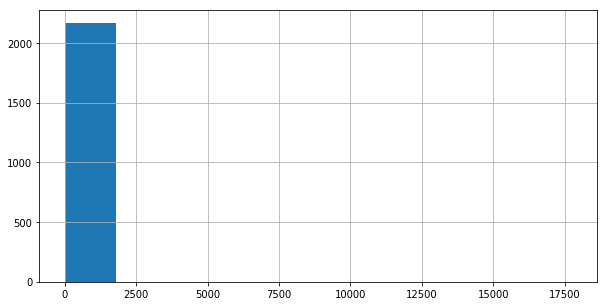

In [40]:
#Preview the distribution of the rating values:
df_copy['rating'].hist(figsize=(10,5));

It looks that most of the values are less than 2500
<br>Let's view the counts for the values that has more than 200 rating

In [41]:
df_copy[df_copy['rating']>=200]['rating'].value_counts()

4200.000000     2
17760.000000    1
342.857143      1
1820.000000     1
6660.000000     1
Name: rating, dtype: int64

This is a **quality** issue, as these limited rows will ruin the rating visualization
Therefore we will need to preview the max value of `rating` less than 200 to put it for these 6 rows
* Firstly we will preview the rows these counts to ensure that they extracted correctly
* Then, will put the max values for them

In [42]:
df_copy[df_copy['rating']>=200][['tweet_id','text', 'rating']]

,tweet_id,text,rating
162,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,4200.000000
163,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",6660.000000
246,838150277551247360,@markhoppus 182/10,1820.000000
428,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,342.857143
803,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,17760.000000
1894,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,4200.000000


The `text` value for the tweet with **`tweet_id`: 810984652412424192**  it is not a rating tweet. Therefore it shall be omitted from the dataset

In [43]:
#CODE:
df_copy = df_copy.drop(df_copy.index[428]).reset_index()
#TEST: the row text value with the same index
df_copy['text'][428]

"This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV"

In [44]:
df_copy[df_copy['rating']<200]['rating'].describe()

count    2168.000000
mean      106.160788
std        22.063363
min         0.000000
25%       100.000000
50%       110.000000
75%       120.000000
max       170.000000
Name: rating, dtype: float64

Set the rating values larger than 2 by the max

In [45]:
#CODE: Set the rating values larger than 2 by the max
df_copy.loc[df_copy['rating']>=200, 'rating'] = df_copy[df_copy['rating']<200]['rating'].max()
#TEST: View the resulted rating description
df_copy['rating'].describe()

count    2173.000000
mean      106.307680
std        22.249305
min         0.000000
25%       100.000000
50%       110.000000
75%       120.000000
max       170.000000
Name: rating, dtype: float64

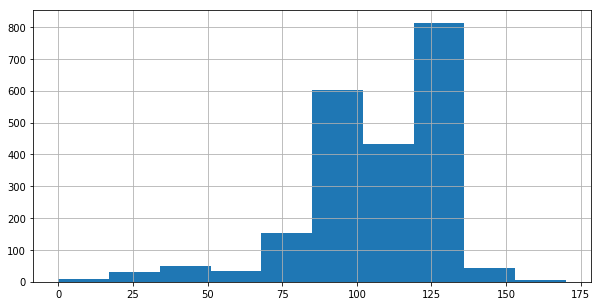

In [46]:
#Preview the distribution of the rating values:
df_copy['rating'].hist(figsize=(10,5));

#### Save the resulted clean dataframe in `twitter_archive_master.csv`

In [47]:
df_copy.to_csv('twitter_archive_master.csv', index=False)

## 4. Visualize The Relations
Now let's preview some of the data statistics:

#### Preview Rated Dogs Stages 

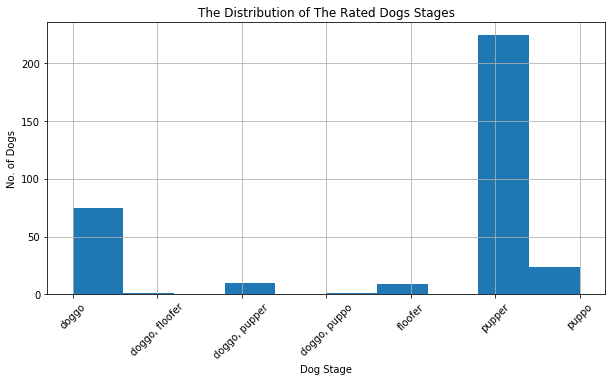

In [48]:
df_copy['stage'].hist(figsize=(10,5));
plt.xlabel("Dog Stage")
plt.ylabel("No. of Dogs")
plt.title("The Distribution of The Rated Dogs Stages")
plt.xticks(rotation=45);

#### Preview the Relation Between the Dogs Stages and Ratings

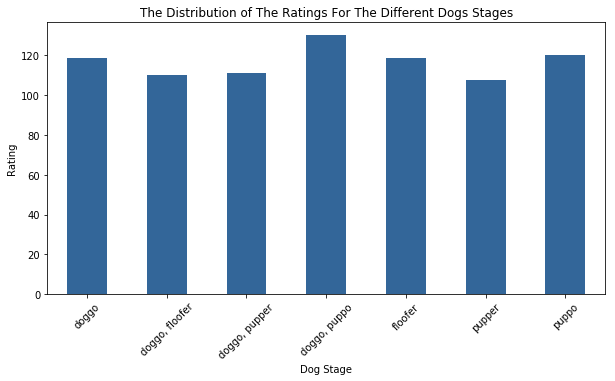

In [49]:
stages_ratings = df_copy.groupby('stage')['rating'].mean()
stages_ratings.plot(kind = 'bar', figsize=(10,5), color=(0.2, 0.4, 0.6, 1))
plt.xlabel("Dog Stage")
plt.ylabel("Rating")
plt.title("The Distribution of The Ratings For The Different Dogs Stages");
plt.xticks(rotation=45);

In [50]:
stages_ratings.sort_values()

stage
pupper            107.378125
doggo, floofer    110.000000
doggo, pupper     111.000000
doggo             118.533333
floofer           118.888889
puppo             120.416667
doggo, puppo      130.000000
Name: rating, dtype: float64

#### Preview the Relation Between the Dogs Stages and Favorite Count

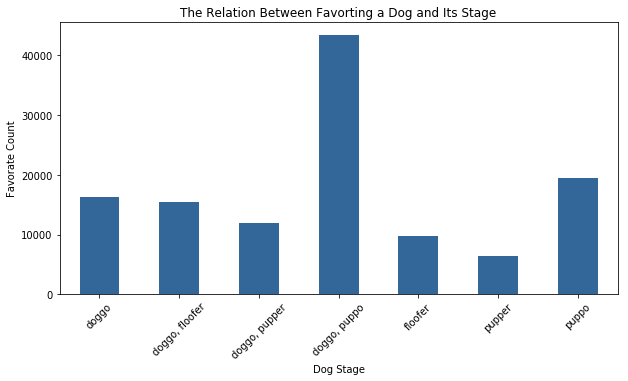

In [51]:
favorite_ratings = df_copy.groupby('stage')['favorite_count'].mean()
favorite_ratings.plot(kind = 'bar', figsize=(10,5), color=(0.2, 0.4, 0.6, 1))
plt.xlabel("Dog Stage")
plt.ylabel("Favorate Count")
plt.title("The Relation Between Favorting a Dog and Its Stage");
plt.xticks(rotation=45);

#### Preview the Relation Between the Dogs Stages and Retweet Count

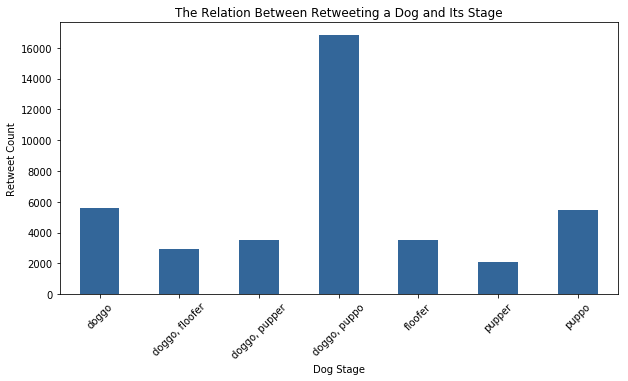

In [52]:
retweet_ratings = df_copy.groupby('stage')['retweet_count'].mean()
retweet_ratings.plot(kind = 'bar', figsize=(10,5), color=(0.2, 0.4, 0.6, 1))
plt.xlabel("Dog Stage")
plt.ylabel("Retweet Count")
plt.title("The Relation Between Retweeting a Dog and Its Stage");
plt.xticks(rotation=45);

#### Preview the relation between the tweet_count and the rating

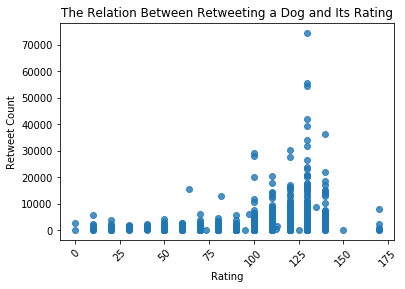

In [53]:
sns.regplot(x=df_copy["rating"], y=df_copy["retweet_count"], fit_reg=False)
plt.figsize = (10,5)
plt.xlabel("Rating")
plt.ylabel("Retweet Count")
plt.title("The Relation Between Retweeting a Dog and Its Rating");
plt.xticks(rotation=45);

#### Preview the relation between the favorite_count and The Rating

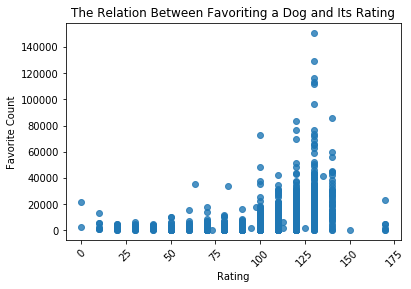

In [54]:
sns.regplot(x=df_copy["rating"], y=df_copy["favorite_count"], fit_reg=False)
plt.figsize = (10,5)
plt.xlabel("Rating")
plt.ylabel("Favorite Count")
plt.title("The Relation Between Favoriting a Dog and Its Rating");
plt.xticks(rotation=45);

In [55]:
df_copy[df_copy['rating']>100]['rating'].value_counts()

120.0    504
110.0    431
130.0    307
140.0     43
170.0      6
135.0      1
112.6      1
150.0      1
112.7      1
125.0      1
Name: rating, dtype: int64

## Conclusions
- The dogs-stages chart showed that `pepper` is the most trendy dog, as more than 200 tweets rated it from the remaining 330 tweets that contains stage information
- Generally the ratings were very close to the different dog stages, However the `doggo, pupper` and `pupper` stages got the highest rating usually with 96%
- 'doggo, puppo' got the highest retweets and favorate counts, although this stage got the lowest rating with 77% approximately
- The last two charts showed that high rating values got higher retweets and are the favorite. The most retweeted and favorite dogs are the dogs that got 120 rating value (12/10)